In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame()

In [3]:
import pandas as pd
df=pd.read_csv('2023빅콘테스트_어드밴스드리그_예술의전당.csv')

In [ ]:
len(df)

In [5]:
print('컬럼별 결측치 갯수')
len(df) - df.count()

컬럼별 결측치 갯수


age                  1300183
gender               1299714
membership_type_1    1299714
membership_type_2    1433215
membership_type_3    1749009
membership_type_4    1890675
membership_type_5    1919586
membership_type_6    1920868
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         864385
open_date                340
genre                  25842
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

In [6]:
df_place = df.sort_values(by=['place','price'],ascending=False)
df_place.count()
df['place'].unique()

array(['콘서트홀', '리사이틀홀', 'IBK챔버홀'], dtype=object)

In [7]:
df_concert = df[df['place']=='콘서트홀']
df_concert = df_concert.sort_values(by=['price'],ascending=False)
df['tran_date'] = pd.to_datetime(df['tran_date'], format='%Y%m%d')
df.set_index('tran_date', inplace=True)
df_concert

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
1453388,50.0,F,무료,그린,NaN,NaN,NaN,NaN,20220927,223,...,0,일반,145,20220918.0,20220919.0,교향곡,콘서트홀,110,15,Y
1373771,40.0,M,골드,무료,NaN,NaN,NaN,NaN,20221010,1624,...,0,일반,145,20220918.0,20220919.0,교향곡,콘서트홀,110,15,Y
1344225,30.0,F,무료,싹틔우미,그린,NaN,NaN,NaN,20220923,849,...,2,일반,145,20220918.0,20220919.0,교향곡,콘서트홀,110,15,Y
1370621,50.0,M,블루,무료,NaN,NaN,NaN,NaN,20220919,1409,...,2,일반,145,20220918.0,20220919.0,교향곡,콘서트홀,110,15,Y
1618939,40.0,F,무료,NaN,NaN,NaN,NaN,NaN,20221014,2129,...,0,일반,145,20220918.0,20220919.0,교향곡,콘서트홀,110,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1637,...,0,초대권,2429,20190628.0,20190628.0,합창,콘서트홀,120,15,N
1208316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191121,1706,...,0,기획사판매,1671,NaN,20190816.0,클래식,콘서트홀,110,15,N
546452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210930,1311,...,0,기획사판매,1006,20210905.0,20210906.0,성악,콘서트홀,120,15,N
1208319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191011,1331,...,0,초대권,1215,20190909.0,20190913.0,합창,콘서트홀,105,15,N


In [8]:
df_re = df[df['place']=='리사이틀홀']
df_re = df_re.sort_values(by=['price'],ascending=False)
df_re

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_time,play_date,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
tran_date,,,,,,,,,,,,,,,,,,,,,
2022-11-13,40.0,F,무료,NaN,NaN,NaN,NaN,NaN,928,20221126,...,2,일반,605,NaN,20221030.0,독주,리사이틀홀,90,15,Y
2022-10-31,40.0,F,무료,NaN,NaN,NaN,NaN,NaN,1231,20221126,...,2,일반,605,NaN,20221030.0,독주,리사이틀홀,90,15,Y
2022-11-13,40.0,F,무료,NaN,NaN,NaN,NaN,NaN,928,20221126,...,2,일반,605,NaN,20221030.0,독주,리사이틀홀,90,15,Y
2022-10-31,40.0,F,무료,NaN,NaN,NaN,NaN,NaN,1231,20221126,...,2,일반,605,NaN,20221030.0,독주,리사이틀홀,90,15,Y
2022-11-13,40.0,F,무료,NaN,NaN,NaN,NaN,NaN,1026,20221126,...,2,일반,605,NaN,20221030.0,독주,리사이틀홀,90,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849,20220712,...,0,초대권,2800,NaN,20220527.0,독주,리사이틀홀,90,15,N
2022-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936,20220911,...,0,초대권,466,NaN,20220819.0,독주,리사이틀홀,90,15,N
2022-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1134,20220924,...,0,초대권,2052,NaN,20220808.0,독주,리사이틀홀,80,15,N


In [9]:
df_ibk = df[df['place']==('IBK챔버홀')]
df_ibk = df_ibk.sort_values(by=['price'],ascending=False)
df_ibk

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_time,play_date,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
tran_date,,,,,,,,,,,,,,,,,,,,,
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257,20210106,...,0,일반,2201,20201218.0,20201218.0,실내악,IBK챔버홀,100,15,N
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257,20210106,...,0,일반,2201,20201218.0,20201218.0,실내악,IBK챔버홀,100,15,N
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257,20210106,...,0,일반,2201,20201218.0,20201218.0,실내악,IBK챔버홀,100,15,N
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257,20210106,...,0,일반,2201,20201218.0,20201218.0,실내악,IBK챔버홀,100,15,N
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257,20210106,...,0,일반,2201,20201218.0,20201218.0,실내악,IBK챔버홀,100,15,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1142,20211117,...,2,기획사판매,1596,20211022.0,20211023.0,실내악,IBK챔버홀,110,15,N
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1332,20200102,...,0,초대권,2434,20191130.0,20191202.0,실내악,IBK챔버홀,90,15,N
2022-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1826,20220610,...,0,초대권,243,20220513.0,20220513.0,실내악,IBK챔버홀,90,15,N


In [10]:
for i in [1,2,3,4,5,6]:
    a=df['membership_type_' + str(i)].unique()
    print(f'멤버쉽 타입 {i} : {a}')

멤버쉽 타입 1 : ['골드' nan '무료' '블루']
멤버쉽 타입 2 : ['무료' nan '그린' '싹틔우미' '골드' '노블']
멤버쉽 타입 3 : ['그린' nan '무료' '싹틔우미' '노블']
멤버쉽 타입 4 : [nan '그린' '싹틔우미' '노블']
멤버쉽 타입 5 : [nan '그린']
멤버쉽 타입 6 : [nan]


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from joblib import Parallel, delayed
import numpy as np
import itertools
from multiprocessing import Pool, current_process

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(df['price'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)
            results = temp_model.fit()

            # Print current iteration's parameters and AIC
            print(f"Testing parameters (p, d, q): {param} and seasonal (P, D, Q, S): {param_seasonal} - AIC: {results.aic}")

            # Compare with best_aic
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print(f"Failed testing parameters (p, d, q): {param} and seasonal (P, D, Q, S): {param_seasonal}")
            continue

print("\n")
print("Best SARIMAX parameters are: ", best_pdq, best_seasonal_pdq, " with AIC: ", best_aic)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (0, 0, 0, 12) - AIC: 46748870.61977406


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (0, 0, 1, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 191. MiB for an array with shape (13, 1920868) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 986, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 191. MiB for an array with shape (13, 1920868) and data type float64
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (0, 1, 0, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (0, 1, 1, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 2.06 GiB for an array with shape (12, 12, 1920868) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 988, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.06 GiB for an array with shape (12, 12, 1920868) and data type float64
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (1, 0, 0, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 2.42 GiB for an array with shape (13, 13, 1920869) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 982, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.42 GiB for an array with shape (13, 13, 1920869) and data type float64
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (1, 0, 1, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (1, 1, 0, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 0) and seasonal (P, D, Q, S): (1, 1, 1, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Testing parameters (p, d, q): (0, 0, 1) and seasonal (P, D, Q, S): (0, 0, 0, 12) - AIC: 46701858.53468987


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 1) and seasonal (P, D, Q, S): (0, 0, 1, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Failed testing parameters (p, d, q): (0, 0, 1) and seasonal (P, D, Q, S): (0, 1, 0, 12)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:


df_concert= pd.get_dummies(df_concert,drop_first=True)
y=df_concert['price']
X=df_concert.drop('price', axis=1)



In [16]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# 
# # 데이터 로드
# data = df_concert.copy()  # 원본 데이터는 변경하지 않기 위해 복사본을 만들어 사용합니다.
# 
# # 범주형 변수만 레이블 인코딩
# categorical_features = ['gender', 'membership_type_1', 'membership_type_2',
#                         'membership_type_3', 'membership_type_4', 'membership_type_5',
#                         'membership_type_6', 'seat', 'discount_type', 'performance_code',
#                         'genre', 'place', 'intermission', 'member_yn']
# 
# label_encoders = {}
# for column in categorical_features:
#     le = LabelEncoder()
#     data[column] = le.fit_transform(data[column].astype(str))  # NaN과 같은 결측값을 처리하기 위해 문자열로 변환
#     label_encoders[column] = le
# 
# # feature와 target 분리
# X = data.drop('price', axis=1)
# y = data['price']
# 
# # train, test 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# # 스케일링
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# 
# # 뉴럴 네트워크 모델 구성
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1)
# ])
# 
# # 모델 컴파일
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# 
# # 학습
# callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)
# 


Epoch 1/100
27425/27425 [==============================] - 28s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
27425/27425 [==============================] - 26s 931us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
27425/27425 [==============================] - 25s 914us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
27425/27425 [==============================] - 25s 923us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
27425/27425 [==============================] - 25s 929us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
27425/27425 [==============================] - 26s 946us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
27425/27425 [==============================] - 25s 912us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
27425/27425 [==============================] - 26s 937us/step - loss: nan - mae: nan - val_los

Epoch 1/100
27425/27425 [==============================] - 27s 970us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
27425/27425 [==============================] - 27s 969us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
27425/27425 [==============================] - 26s 957us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
27425/27425 [==============================] - 26s 944us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
27425/27425 [==============================] - 27s 987us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
27425/27425 [==============================] - 26s 965us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
27425/27425 [==============================] - 26s 959us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
27425/27425 [==============================] - 26s 936us/step - loss: nan - mae: nan - val_l

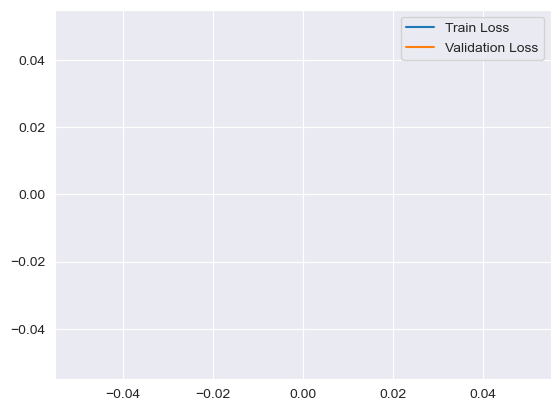

In [20]:
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)
# 
# # 학습 과정 시각화
# import matplotlib.pyplot as plt
# 
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()


6857/6857 [==============================] - 4s 532us/step


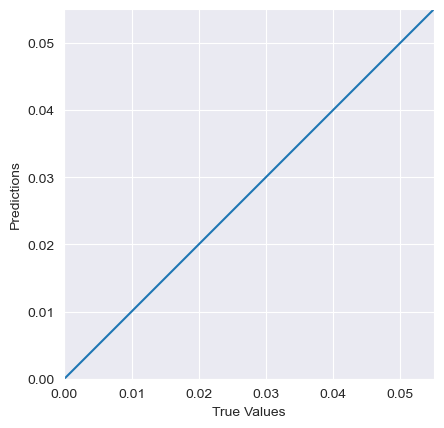

In [29]:
# predictions = model.predict(X_test)
# 
# plt.scatter(y_test, predictions)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# plt.plot([-1000, 1000], [-1000, 1000])
# plt.show()